# ***DIP Assignment0*** <br>
Submitted by: Avani Gupta <br>
2019121004

collab link: https://colab.research.google.com/drive/1BFog9f8vkIZn96MQP6rvhDRKm6ILHxql?usp=sharing

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [2]:
import cv2
from google.colab.patches import cv2_imshow 
import matplotlib.pyplot as plt 

In [3]:
def readImg(imgname,path):
  return cv2.imread(path+imgname) 

In [4]:
path = '/gdrive/My Drive/images/'
from os import listdir
from os.path import isfile, join
files = [f for f in listdir(path) if isfile(join(path, f))]

In [5]:
img = []
for f in files:
  img.append(readImg(f,path))

In [6]:
print(len(img))

4


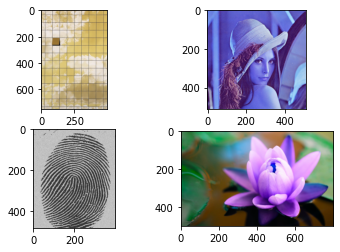

In [7]:
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(img[0])
axarr[0,1].imshow(img[1])
axarr[1,0].imshow(img[2])
axarr[1,1].imshow(img[3])

OpenCV represents RGB images as multi-dimensional NumPy arrays in reverse order.
Hence we convert RGB to BGR by using cv2.COLOR_BGR2RGB

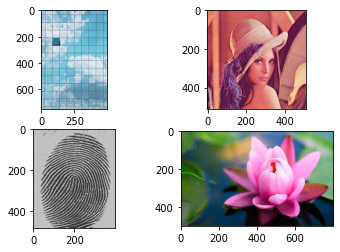

In [8]:
f1, axarr1 = plt.subplots(2,2)
axarr1[0,0].imshow(cv2.cvtColor(img[0],cv2.COLOR_BGR2RGB))
axarr1[0,1].imshow(cv2.cvtColor(img[1],cv2.COLOR_BGR2RGB))
axarr1[1,0].imshow(cv2.cvtColor(img[2], cv2.COLOR_BGR2RGB))
axarr1[1,1].imshow(cv2.cvtColor(img[3],cv2.COLOR_BGR2RGB))

In [9]:
print(img[3])

[[[ 84 120  90]
  [ 81 117  87]
  [ 79 117  87]
  ...
  [153 159  88]
  [152 158  87]
  [152 158  87]]

 [[ 85 121  91]
  [ 82 118  88]
  [ 80 118  88]
  ...
  [153 159  88]
  [152 158  87]
  [153 159  88]]

 [[ 84 122  92]
  [ 82 120  90]
  [ 82 121  89]
  ...
  [153 159  88]
  [152 158  87]
  [153 159  88]]

 ...

 [[ 74 100  77]
  [ 73  99  76]
  [ 73  99  76]
  ...
  [ 60  32   1]
  [ 60  32   2]
  [ 60  32   2]]

 [[ 73  99  76]
  [ 72  98  75]
  [ 72  98  75]
  ...
  [ 60  32   1]
  [ 60  32   2]
  [ 60  32   2]]

 [[ 72  98  75]
  [ 71  97  74]
  [ 71  97  74]
  ...
  [ 60  32   1]
  [ 60  32   2]
  [ 60  32   2]]]


In [10]:
import numpy as np
gImg= np.mean(img[3], axis=2)

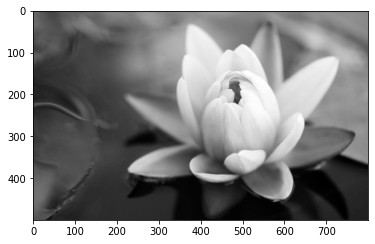

In [11]:
plt.imshow(gImg, cmap='gray')

In [12]:
import os
path = '/gdrive/My Drive/images/'
plt.imsave(os.path.join(path,'grayImg.png'), gImg,cmap='gray')
           

In [13]:
def dim(img):
    # get dimensions of image
    dimensions = img.shape
    # height, width, number of channels in image
    height = img.shape[0]
    width = img.shape[1]
    print('Image Dimension    : ',dimensions)
    print('Image Height       : ',height)
    print('Image Width        : ',width)
    if(len(dimensions)>2):
      print('Image Channels   :',dimensions[2] )


In [14]:
dim(gImg)

Image Dimension    :  (500, 800)
Image Height       :  500
Image Width        :  800


In [15]:
def checkRange(img):
  print("max val",np.max(img))
  print("min val",np.min(img))


In [16]:
def checkChannelWiseRange(img):
  print('Red')
  print("max val",np.max(img[:,:,0]))
  print("min val",np.min(img[:,:,0]))
  print('Green')
  print("max val",np.max(img[:,:,1]))
  print("min val",np.min(img[:,:,1]))
  print('Blue')
  print("max val",np.max(img[:,:,2]))
  print("min val",np.min(img[:,:,2]))
  


In [17]:
# color img
dim(img[3])
checkRange(img[3])
checkChannelWiseRange(img[3])

Image Dimension    :  (500, 800, 3)
Image Height       :  500
Image Width        :  800
Image Channels   : 3
max val 255
min val 0
Red
max val 255
min val 0
Green
max val 251
min val 0
Blue
max val 255
min val 0


As seen above the image has a range 0-255 i.e has 256 values. This implies that the pixel value of image is a 8-bit data value (256 = ${2^8}$)

# Optional Questions

1) Learn to read, show and save images using Scikit-image,  PIL and Matplotlib also.

In [18]:
from skimage import io

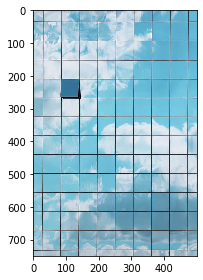

In [19]:
skimg = io.imread(path+files[0], plugin='matplotlib')
io.imshow(skimg)

In [20]:
skimg.shape

(750, 500, 3)

In [21]:
skimg_uint8 = skimg.astype(np.uint8)
io.imsave(path+'skimg.png',skimg_uint8)

In [22]:
from PIL import Image
Pilimg = Image.open(path+files[0])

In [23]:
!apt-get install imagemagick

Reading package lists... Done
Building dependency tree       
Reading state information... Done
imagemagick is already the newest version (8:6.9.7.4+dfsg-16ubuntu6.8).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [24]:
from __future__ import print_function
print(Pilimg.format, Pilimg.size, Pilimg.mode)

JPEG (500, 750) RGB


In [25]:
Pilimg.show()

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [27]:
pltimg = mpimg.imread(path+files[0])
print(pltimg)

[[[213 221 232]
  [212 220 231]
  [212 220 231]
  ...
  [ 99 186 214]
  [ 99 186 214]
  [ 99 186 214]]

 [[211 219 230]
  [211 219 230]
  [211 219 230]
  ...
  [ 99 186 214]
  [ 99 186 214]
  [ 99 186 214]]

 [[207 215 226]
  [207 217 227]
  [209 219 229]
  ...
  [ 99 186 214]
  [ 99 186 214]
  [ 99 186 214]]

 ...

 [[169 195 208]
  [169 195 208]
  [169 195 208]
  ...
  [164 186 199]
  [169 188 202]
  [172 190 204]]

 [[169 195 208]
  [169 195 208]
  [169 195 208]
  ...
  [163 187 199]
  [167 189 202]
  [172 191 205]]

 [[169 195 208]
  [169 195 208]
  [169 195 208]
  ...
  [161 188 199]
  [166 190 202]
  [170 192 205]]]


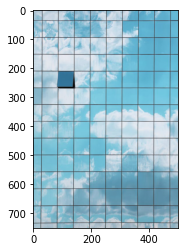

In [28]:
imgplot = plt.imshow(pltimg)

In [29]:
plt.imsave(os.path.join(path,'pltImg.png'), pltimg,cmap='gray')
           